<a href="https://colab.research.google.com/github/pragneshrana/DeepLearning/blob/master/EncoderDecoder/AttentionMechanism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Attention is All You Need.**
- https://papers.nips.cc/paper/7181-attention-is-all-you-need.pdf

- Human try to produce each word in the output by focusing only on certain words in the input
  - I/P: **मैं** घर जा रहा हूँ
  - O/P: **I** am going home
    - Here each word has different mapping and focus(Distribution) varies. 
    - मैं -> I -> $t_1 =$ [1 0 0 0 0]
    - घर -> Home -> $t_2 = $[0 1 0 0 0]
    - जा रहा -> going -> $t_3 = $[0  0 0.5 0.5 0]
    -  हूँ -> am -> $t_3 = $[0  0 0 0 1]

- Rather than feeding all the information, should feed only what is inportannt
- Distribution tell us how much attention to pay to each input words at each time step

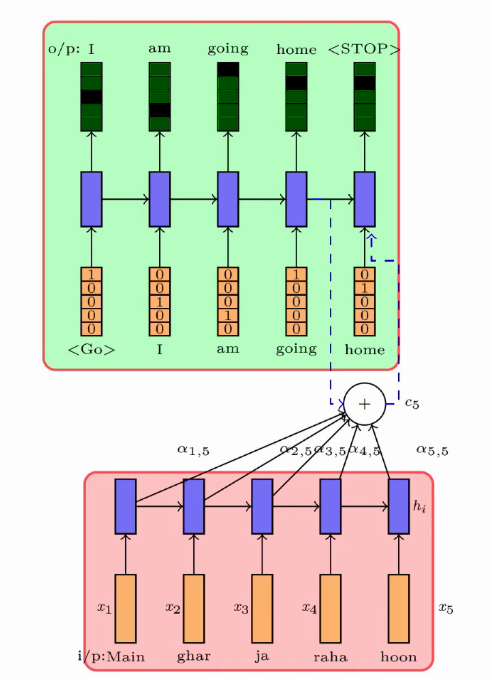

-  Before model was,
  - $s_t = RNN(s_{t-1},[h_t, e(y_{t-1}]$ (Not Useful)
  - Rather than if we use some kind of oracle which tell us that what is actually required then we can only pass that. So, One of the way is to use weighted average and then pass it to decoder mathematically,
  - $c_t = \sum_{j=1}^T \alpha_{jt} h_t$
  - $s_t = RNN(s_{t-1},[c_t,e(y_{t-1})])$

- To enable this we have to define a function $e_{ij} = f_{ATT}(s_{t-1},h_j,\theta)$. This quantity captures the importance of the $j^{th}$, input word for decoding the $t^{th}$ output word.
- Normalize the weights by using softmax function,
    - $\alpha_{jt} = \frac{\exp(e_{jt})}{\sum_{j=1}^M \exp(e_{jt})}$

**How can we learn** $\alpha$?

- Functional from of $f_{ATT}$  is, 

  $e_{jt} = V^T_{att} \tanh(U_{att}s_{t-1} + W_{att} h_j$
 
 where, $ V_{att} \in \mathcal R^d$,$ U_{att} \in \mathcal R^{dXd}$, $W_{att}\mathcal R^{dXd}$. This parameters can be learned along the other parameters of the encoder and decoder

# Machine Translation:

- Task :  Machine Translation 
- data :
  - $\{x_i = image ,y_i = caption_i\}_{i=1}^N$
- Model:
  - $y = f(x)$
  - Encoder :
    - $h_t = LSTM(h_{t-1},x_{it})$
    - $s_0 = h_T (T $ is lenght of input)
  - Decoder :
    - $ e_{jt} = V^T \tanh (U_{att} h_t + W_{att} s_t)$
    - $\alpha_{jt} = softmax (e_{jt})$
    - $c_{t} = \sum_{j=1}^T \alpha_{jt} h_j$
    - $s_t = LSTM(s_{t-1},e(\hat y_{t-1},c_t)$ 

    - $l_t = softmax(V s_t+b)$

- Parameters : $U_{decoder}, V, W_{decoder}, U_{encoder}, W_{encoder}, b, U_{att}, V_{att}$

- Loss : 
  - $ \sum_{i=1}^T \mathcal L_t (\theta) = - \sum_{i=1}^T \log P(y_t = l_t | y_1{t-1},I)$
- Algorithm : Gradient Descent with backpropogation